In [44]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from PIL import Image
import shutil

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score
#from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [4]:
'''import mimetypes

# Check MIME type
mime_type, _ = mimetypes.guess_type(zip_file_path)
print(f"MIME type of the file: {mime_type}")'''

'import mimetypes\n\n# Check MIME type\nmime_type, _ = mimetypes.guess_type(zip_file_path)\nprint(f"MIME type of the file: {mime_type}")'

In [5]:
'''import zipfile
import os

#path to the uploaded zip file
zip_file_path = '/content/Data/color.zip'

#directory to extract to
extract_dir = '/content/Data/images/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Check the contents
os.listdir(extract_dir)'''

"import zipfile\nimport os\n\n#path to the uploaded zip file\nzip_file_path = '/content/Data/color.zip'\n\n#directory to extract to\nextract_dir = '/content/Data/images/'\n\nwith zipfile.ZipFile(zip_file_path, 'r') as zip_ref:\n    zip_ref.extractall(extract_dir)\n\n# Check the contents\nos.listdir(extract_dir)"

In [ ]:
!unzip /content/Data/color.zip -d /content/Data/color.zip

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#dataset_path = '/content/drive/MyDrive/Colab Notebooks/Data/color'
dataset_path= 'C:/Users/Lenovo/Desktop/Guvi DS/Project/Disease Classification/Data/color'

In [6]:
file_paths = []
labels = []


# Function to check if a file is an image
def is_image_file(file_path):
    try:
        img = Image.open(file_path)
        img.verify()
        return True
    except :
        return False

In [7]:
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        #print(f'Processing directory: {root}')
        file_path = os.path.join(root, file)
        if is_image_file(file_path) :
            file_paths.append(file_path)
            labels.append(os.path.basename(root))
            #print(os.path.basename(root))

print(f'Found {len(file_paths)} images')

print(f'Unique labels : {len(set(labels))} , as follows \n {set(labels)}')

Found 54305 images
Unique labels : 38 , as follows 
 {'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Leaf_Mold', 'Apple___Apple_scab', 'Tomato___Tomato_mosaic_virus', 'Potato___Late_blight', 'Tomato___Target_Spot', 'Tomato___healthy', 'Raspberry___healthy', 'Apple___Cedar_apple_rust', 'Tomato___Septoria_leaf_spot', 'Apple___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Blueberry___healthy', 'Grape___healthy', 'Tomato___Late_blight', 'Tomato___Early_blight', 'Pepper,_bell___healthy', 'Corn_(maize)___Common_rust_', 'Strawberry___healthy', 'Apple___Black_rot', 'Potato___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Corn_(maize)___healthy', 'Grape___Esca_(Black_Measles)', 'Grape___Black_rot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Squash___Powdery_mildew', 'Potato___Early_blight', 'Soybean___healthy', 'Peach___healthy', 'Cherry_(including_sour)___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Pepper,_bell___Bacterial_spot', 'Strawberry___Leaf_scorch',

In [8]:
'''Creating a dataframe to store the image paths and corresponding labels for easier access and better understanding'''

filePath_series = pd.Series(file_paths, name='Filepaths')
label_series = pd.Series(labels, name='Labels')

df = pd.concat([filePath_series, label_series], axis=1)

train_files, test_files, train_labels, test_labels = train_test_split(file_paths, labels , test_size=0.2, random_state=42, stratify = labels)

print(f'Train set size: {len(train_files)}')
print(f'Test set size: {len(test_files)}')

Train set size: 43444
Test set size: 10861


In [13]:
train_filesSeries = pd.Series(train_files)
train_labelsSeries = pd.Series(train_labels)
training_df = pd.DataFrame({'Filepaths' : train_filesSeries, 'Labels' : train_labelsSeries})
training_df.head()

,Filepaths,Labels
0,C:/Users/Lenovo/Desktop/Guvi DS/Project/Diseas...,Tomato___Bacterial_spot
1,C:/Users/Lenovo/Desktop/Guvi DS/Project/Diseas...,Soybean___healthy
2,C:/Users/Lenovo/Desktop/Guvi DS/Project/Diseas...,Corn_(maize)___Northern_Leaf_Blight
3,C:/Users/Lenovo/Desktop/Guvi DS/Project/Diseas...,Squash___Powdery_mildew
4,C:/Users/Lenovo/Desktop/Guvi DS/Project/Diseas...,Blueberry___healthy


In [9]:
test_filesSeries = pd.Series(test_files, name='Filepaths')
test_labelsSeries = pd.Series(test_labels, name='Labels')
testing_df = pd.concat([test_filesSeries,test_labelsSeries], axis=1)
testing_df.head()

,Filepaths,Labels
0,C:/Users/Lenovo/Desktop/Guvi DS/Project/Diseas...,Orange___Haunglongbing_(Citrus_greening)
1,C:/Users/Lenovo/Desktop/Guvi DS/Project/Diseas...,Soybean___healthy
2,C:/Users/Lenovo/Desktop/Guvi DS/Project/Diseas...,Grape___Black_rot
3,C:/Users/Lenovo/Desktop/Guvi DS/Project/Diseas...,Soybean___healthy
4,C:/Users/Lenovo/Desktop/Guvi DS/Project/Diseas...,Cherry_(including_sour)___Powdery_mildew


In [ ]:
'''I have loaded the gdrive to access the data in this collab notebook, but if you are running it on local device and need to store the train
    and test data seperately for future purpose use this.'''

train_dir = 'C:/Users/Lenovo/Desktop/Guvi DS/Project/Disease Classification/Data/trainData'
test_dir = 'C:/Users/Lenovo/Desktop/Guvi DS/Project/Disease Classification/Data/testData'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


for file, label in zip(train_files, train_labels):
    label_dir = os.path.join(train_dir, label)
    os.makedirs(label_dir, exist_ok=True)
    shutil.copy(file, label_dir)

for file, label in zip(test_files, test_labels):
    label_dir = os.path.join(test_dir, label)
    os.makedirs(label_dir, exist_ok=True)
    shutil.copy(file, label_dir)

Data Augmentation Step : Doing this so that the final model can train on variation of the data , hence improving the potential for generalization.

In [10]:
'''Initializing the train and test Data Generators'''

train_dataGen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_dataGen = ImageDataGenerator(rescale=1./255)

In [26]:
train_generator = train_dataGen.flow_from_dataframe(
    dataframe=training_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=(250, 250),
    batch_size=64,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 43444 validated image filenames belonging to 38 classes.


In [27]:
test_generator = test_dataGen.flow_from_dataframe(
    dataframe=testing_df,
    x_col = 'Filepaths',
    y_col = 'Labels',
    target_size = (250, 250),
    batch_size = 64,
    class_mode ='categorical',
    shuffle = False
)

Found 10861 validated image filenames belonging to 38 classes.


In [28]:
training_df['Labels'].nunique()

38

In [29]:
classifier = Sequential()

classifier.add(Conv2D(filters = 96,kernel_size = (11,11), input_shape = (250,250,3), strides = (4,4), padding = 'valid', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'valid'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(filters = 256, kernel_size = (11,11), strides = (1,1), padding = 'valid', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'valid'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(filters = 256, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'valid'))
classifier.add(BatchNormalization())

classifier.add(Flatten())

classifier.add(Dense(4096, input_shape = (250*250*3, ), activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())

classifier.add(Dense(4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())

classifier.add(Dense(training_df['Labels'].nunique()))
classifier.add(Activation('softmax'))
classifier.summary()

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 30, 30, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 20, 20, 256)    │     2,973,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 8, 8, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 6, 6, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │     4,198,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │       155,686 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 27,280,166 (104.07 MB)

 Trainable params: 27,261,030 (103.99 MB)

 Non-trainable params: 19,136 (74.75 KB)

In [35]:
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
#lr_reducer = ReduceLROnPlateau(
#    monitor='val_loss',   # Monitor validation loss
#    factor=0.5,           # Reduce learning rate by half
#    patience=2,           # Wait for 2 epochs before reducing
#    min_lr=1e-6           # Minimum learning rate
#)

adam_optimizer = Adam(clipnorm=1.0)
classifier.compile(optimizer = adam_optimizer , loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#history = classifier.fit(
#    train_generator,
#    validation_data=test_generator,#
#    epochs=10,            # Total number of epochs
#    callbacks=[early_stopping,lr_reducer] # Include the learning rate reducer
#)

In [36]:
final_model = classifier.fit(train_generator,validation_data= test_generator,epochs = 10)

Epoch 1/10


C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


679/679 ━━━━━━━━━━━━━━━━━━━━ 13723s 20s/step - accuracy: 0.3138 - loss: 2.9908 - val_accuracy: 0.1574 - val_loss: 6.5950
Epoch 2/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 20514s 30s/step - accuracy: 0.5799 - loss: 1.4702 - val_accuracy: 0.4595 - val_loss: 2.4267
Epoch 3/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 1954s 3s/step - accuracy: 0.6783 - loss: 1.0971 - val_accuracy: 0.4670 - val_loss: 2.5165
Epoch 4/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 9673s 14s/step - accuracy: 0.7425 - loss: 0.8534 - val_accuracy: 0.5600 - val_loss: 1.8142
Epoch 5/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 27845s 41s/step - accuracy: 0.7796 - loss: 0.7241 - val_accuracy: 0.6129 - val_loss: 1.3754
Epoch 6/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 5257s 8s/step - accuracy: 0.8042 - loss: 0.6426 - val_accuracy: 0.7727 - val_loss: 0.8311
Epoch 7/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 1839s 3s/step - accuracy: 0.8314 - loss: 0.5484 - val_accuracy: 0.5377 - val_loss: 9.9853
Epoch 8/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 1940s 3s/step - accuracy: 0.8471 - loss: 0.5048 - val_

In [41]:
final_model.history

{'accuracy': [0.40958476066589355,
  0.6096354126930237,
  0.6972424387931824,
  0.7530384063720703,
  0.7872893810272217,
  0.8120108842849731,
  0.8325200080871582,
  0.8485636711120605,
  0.8637096285820007,
  0.8721802830696106],
 'loss': [2.344032049179077,
  1.3611786365509033,
  1.024672269821167,
  0.8227189779281616,
  0.7013182044029236,
  0.6193338632583618,
  0.5460861921310425,
  0.4862726330757141,
  0.4371498227119446,
  0.40879225730895996],
 'val_accuracy': [0.1574440598487854,
  0.4595341086387634,
  0.46699199080467224,
  0.5599852800369263,
  0.6129269599914551,
  0.7726728916168213,
  0.5377036929130554,
  0.6927539110183716,
  0.9080195426940918,
  0.8235889673233032],
 'val_loss': [6.595019817352295,
  2.4266743659973145,
  2.516460418701172,
  1.8142441511154175,
  1.3754266500473022,
  0.8311319947242737,
  9.98530101776123,
  1.2573823928833008,
  0.2818676829338074,
  0.589258074760437]}

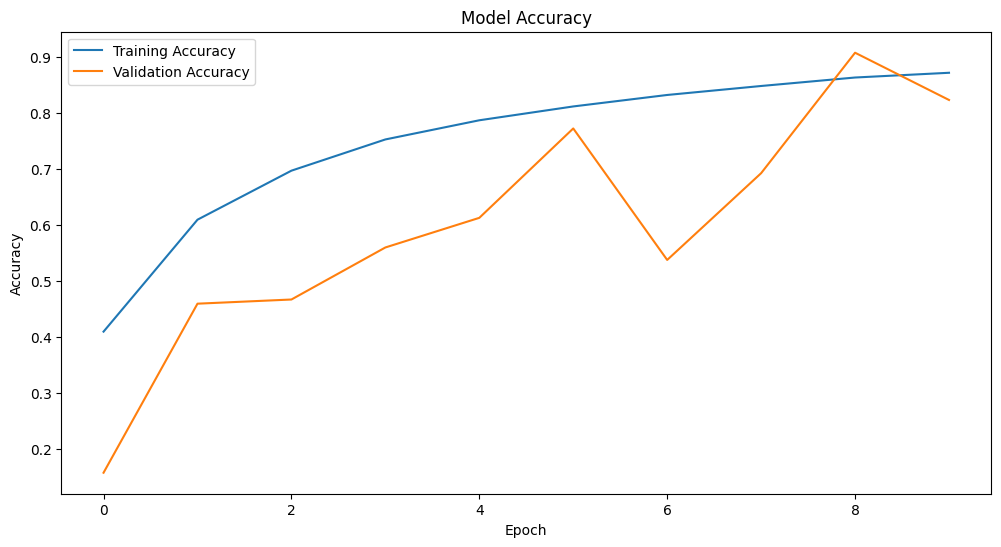

In [42]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.figure(figsize=(12, 6))

# Training accuracy
plt.plot(final_model.history['accuracy'], label='Training Accuracy')
# Validation accuracy
plt.plot(final_model.history['val_accuracy'], label='Validation Accuracy')

# Adding labels and title
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Show the plot
plt.show()

In [51]:
classifier.save('AlexnetCNN.hdf5')